In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
musicData = pd.read_csv("Resources/music.csv")

# Review the DataFrame
musicData.head(20)

#define the genreIndex
genreIndex=['Acoustic/Folk_0',
           'Alt_Music_1', 
           'Blues_2',
           'Bollywood_3',
           'Country_4',
           'HipHop_5',
           'Indie Alt_6',
           'Instrumental_7',
           'Metal_8',
           'Pop_9',
           'Rock_10']

musicData

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
# Drop non-contributing ID columns
musicDF = musicData.drop(columns=['Artist Name', 'Track Name'])


# Optional: Change Artist Name and Track Name to string
#cat_col = ['Artist Name','Track Name']

#for i in cat_col:
#    data[i] = data[i].astype('str') 


# musicDF

In [4]:
# Count the number of NaN values in each column
nan_counts = musicDF.isna().sum()
# nan_counts

In [5]:
# Count the number of rows with at least one NaN value
rows_with_nan = musicDF.isna().any(axis=1).sum()
# rows_with_nan

In [6]:
# Option1: Drop instrumentalness for now since there are many NaN's- try to figure out how to populate NaN's later?  
# musicDF = musicDF.drop(columns=['Popularity', 'key', 'instrumentalness'])

In [7]:
# musicDF.shape

In [8]:
# Option2: drop samples with NaN values
#musicDF = musicDF.dropna()

In [9]:
# Option3: imput missing with zero
musicDF = musicDF.fillna(0)

In [10]:
# musicDF.shape

### Split Data Into Features and our Label (genre)

In [11]:
# Separate the data into labels (Class = genre) and features/attributes

# Separate the y variable, the labels
y = musicDF["Class"].values


# Separate the X variable, the features
X = musicDF.drop("Class", axis=1).values

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#### Scale Data

In [13]:
# import the StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

# make the instance of the standard scaler
scaler = StandardScaler()

# fit the scaler onto the data
X_scaler = scaler.fit(X_train)

# scale the x train and test using .transform function
xTrainScaled = X_scaler.transform(X_train)
xTestScaled = X_scaler.transform(X_test)

### First Try Random Forest Classifier to Create Model

In [14]:
# import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier model
rfModel = RandomForestClassifier(n_estimators=500, random_state=78)

# fit the model onto our scaled X training data and the trained y data
rfModel = rfModel.fit(xTrainScaled, y_train)

In [15]:
# make the predictions using the testing data
predictedValues = rfModel.predict(xTestScaled)

#### Determine Accuracy

In [16]:
# import the modules for the confusion matrix, accuracy score, and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"Random Forest Classifier Accuracy Score: {(accuracyScore*100):.2f}%")

Random Forest Classifier Accuracy Score: 51.26%


In [18]:
# rf confusion matrix; Predicted is columns, Actuals are rows
rfConfusionData = confusion_matrix(y_test, predictedValues)

rfConfusionDF = pd.DataFrame(
    rfConfusionData,
    index=genreIndex,
    columns=genreIndex
)
rfConfusionDF

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
Acoustic/Folk_0,128,0,0,8,11,0,0,0,0,7,2
Alt_Music_1,0,5,11,0,0,10,114,0,8,33,162
Blues_2,0,0,94,0,0,4,40,0,3,25,152
Bollywood_3,21,0,0,70,6,0,0,3,0,0,0
Country_4,15,0,0,1,69,0,0,0,0,10,2
HipHop_5,0,1,2,0,0,257,23,0,0,58,21
Indie Alt_6,0,86,29,0,0,24,183,0,16,69,240
Instrumental_7,6,0,0,1,0,0,0,137,0,0,0
Metal_8,0,0,1,0,0,0,12,0,251,0,200
Pop_9,14,5,11,1,2,54,66,1,0,331,146


In [19]:
# classification report
print(classification_report(y_test, predictedValues))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       156
           1       0.04      0.01      0.02       343
           2       0.46      0.30      0.36       318
           3       0.82      0.70      0.76       100
           4       0.68      0.71      0.69        97
           5       0.71      0.71      0.71       362
           6       0.34      0.28      0.31       647
           7       0.97      0.95      0.96       144
           8       0.64      0.54      0.59       464
           9       0.52      0.52      0.52       631
          10       0.46      0.63      0.53      1237

    accuracy                           0.51      4499
   macro avg       0.57      0.56      0.56      4499
weighted avg       0.49      0.51      0.50      4499



In [41]:
# calculate feature importance 
importantFeatures = rfModel.feature_importances_
featureNames = musicDF.drop("Class", axis=1).columns

# sort the features by their importance, zip them, and display them
zippedFeatures = sorted(zip(importantFeatures, featureNames), reverse=True)
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
importantFeaturesDF

,Feature Importances
1,
duration_in min/ms,0.120576
acousticness,0.103412
speechiness,0.098946
instrumentalness,0.090727
danceability,0.085935
energy,0.085606
valence,0.078787
Popularity,0.077640
loudness,0.076602


<Axes: title={'center': 'Feature Importance'}, ylabel='1'>

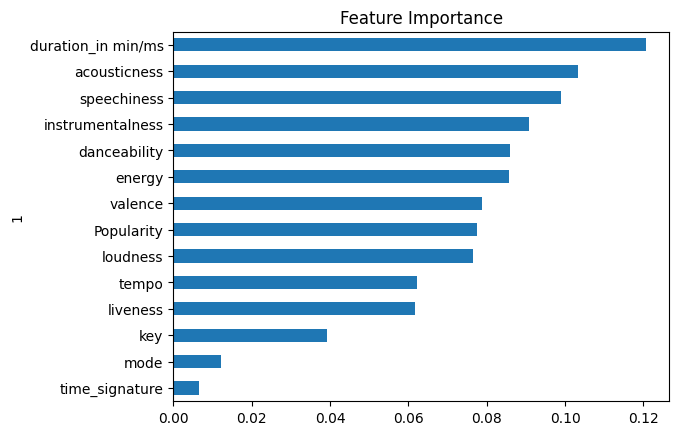

In [48]:
# horizontal bar chart
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")
importantFeaturesDFSorted.plot(
    kind='barh',
    title='Feature Importance',
    legend=False
    )

### Try a Logistic Regression Model with the Original Data

In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifierModel = LogisticRegression(solver='lbfgs', random_state=1)
classifierModel

LogisticRegression(random_state=1)

In [21]:
# Fit the model using training data
classifierModel.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [22]:
# validate the model using the test data - use .score() function to get the accuracy
model_score_train = classifierModel.score(X_train, y_train)
print("Model Score (Accuracy) - Trained Data:", model_score_train)

Model Score (Accuracy) - Trained Data: 0.2968066977846929


In [23]:
model_score_test = classifierModel.score(X_test, y_test)
print("Logistic Regression Model Score (Accuracy):", model_score_test)

Logistic Regression Model Score (Accuracy): 0.29628806401422536


### Try K Nearest Neighbor (KNN) Classifyier

In [24]:
unique_genres = musicDF['Class'].nunique()
unique_genres

11

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xTrainScaled, y_train)


KNeighborsClassifier(n_neighbors=11)

In [26]:
predictedValues = knn.predict(xTestScaled)

In [27]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"KNN Model Accuracy Score: {(accuracyScore*100):.2f}%")

KNN Model Accuracy Score: 46.48%


## GENRE PREDICTOR

In [28]:
from ipywidgets import interact, Dropdown

# Fill in nan's with 0
musicData = musicData.fillna(0)

# select the trained and tested model to use: rfModel or knn; this could be made a dropdown as well
modelType = rfModel

# Create the dropdown options with Track Name and Artist Name
dropdown_options = [(f"{track} - {artist}", track) for track, artist in zip(musicData['Track Name'], musicData['Artist Name'])]
dropdown = Dropdown(options=dropdown_options)

# Define a function to handle the dropdown value change
def on_dropdown_change(change):
    # Retrieve the selected value from the dropdown
    selected_track = change.new
    
    # Update the 'sample_track_name' variable with the selected value
    sample_track_name = selected_track
    
    # Continue with the rest of the code
    sample_data = musicData[musicData['Track Name'] == sample_track_name].values
    sample_artist_name = sample_data[0, 0]
    sample_actual_genre = sample_artist_name = sample_data[0, 16]
    sample_data = sample_data[:, 2:-1]
    sample_data_scaled = scaler.transform(sample_data)  # Preprocess the sample data using the scaler

    # Make the prediction
    prediction = modelType.predict(sample_data_scaled)

    # Convert prediction output to Genre
    genre_label = {
        0: 'Acoustic/Folk_0',
        1: 'Alt_Music_1',
        2: 'Blues_2',
        3: 'Bollywood_3',
        4: 'Country_4',
        5: 'HipHop_5',
        6: 'Indie Alt_6',
        7: 'Instrumental_7',
        8: 'Metal_8',
        9: 'Pop_9',
        10: 'Rock_10'
    }

    predicted_genre = genre_label[prediction[0]]
    actual_genre = genre_label[sample_actual_genre]  

    print(f"Predicted genre for the sample '{sample_track_name}': {predicted_genre}")
    print(f"Actual genre for the sample '{sample_track_name}': {actual_genre}")

# Register the function to handle the dropdown value change event
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown
display(dropdown)

Dropdown(options=(("That's What I Like (feat. Gucci Mane) - Bruno Mars", "That's What I Like (feat. Gucci Mane…

## SPOTIFY GENRE CLASSIFIER

In [29]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import ipywidgets as widgets
from IPython.display import display

In [30]:
# Set up your Spotify API credentials
client_id = '7f37bb631ed34cf29a487f88d5c5e32f'
client_secret = 'aff5f020a49b470f99d7a3c251f5b649'

# Authenticate with the Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define a function to get track audio features
def get_track_audio_features(artist_name, track_name):
    # Search for the track
    results = sp.search(q=f"artist:{artist_name} track:{track_name}", type='track')

    # Check if the search results contain any tracks
    if len(results['tracks']['items']) == 0:
        print(f"No track found for '{artist_name} - {track_name}'")
        return None

    # Get the first track from the search results
    track = results['tracks']['items'][0]

    # Get the track's ID
    track_id = track['id']

    # Get audio features for the track
    audio_features = sp.audio_features(track_id)

    # Extract desired features
    track_features = {}
#    track_features['Artist'] = artist_name
#    track_features['Track'] = track_name
    track_features['Popularity'] = track['popularity']
    track_features['Danceability'] = audio_features[0]['danceability']
    track_features['Energy'] = audio_features[0]['energy']
    track_features['Key'] = audio_features[0]['key']
    track_features['Loudness'] = audio_features[0]['loudness']
    track_features['Mode'] = audio_features[0]['mode']
    track_features['Speechiness'] = audio_features[0]['speechiness']
    track_features['Acousticness'] = audio_features[0]['acousticness']
    track_features['Instrumentalness'] = audio_features[0]['instrumentalness']
    track_features['Liveness'] = audio_features[0]['liveness']
    track_features['Valence'] = audio_features[0]['valence']
    track_features['Tempo'] = audio_features[0]['tempo']
    track_features['Duration (ms)'] = audio_features[0]['duration_ms']
    track_features['Time Signature'] = audio_features[0]['time_signature']

    return track_features


In [31]:
def predict_genre(feature_array): 
    feature_array = np.array(feature_array).reshape(1, -1)
    spotify_track_scaled = scaler.transform(feature_array)  # Preprocess the sample data using the scaler

    # Make the prediction
    prediction = modelType.predict(spotify_track_scaled)

    # Convert prediction output to Genre
    genre_label = {
        0: 'Acoustic/Folk_0',
        1: 'Alt_Music_1',
        2: 'Blues_2',
        3: 'Bollywood_3',
        4: 'Country_4',
        5: 'HipHop_5',
        6: 'Indie Alt_6',
        7: 'Instrumental_7',
        8: 'Metal_8',
        9: 'Pop_9',
        10: 'Rock_10'
    }

    predicted_genre = genre_label[prediction[0]]
    
    return predicted_genre



In [32]:
def show_track_prediction(track_name, artist_name):
    # Get the user input
    #track_name = track_name_widget.value
    #artist_name = artist_name_widget.value

    # Print the user input
    print(f"Track Name: {track_name}")
    print(f"Artist Name: {artist_name}")

    track_features = get_track_audio_features(artist_name, track_name)

    # Check if track features are available
    if track_features is not None:

        # Convert the dictionary to an array
        feature_array = [track_features[key] for key in track_features]

        # Print the feature array
        #print(feature_array)

        predicted_genre = predict_genre(feature_array)

        print(f"Predicted genre for '{track_name}' by {artist_name}: {predicted_genre}")

In [33]:
# Create text input widgets
track_name_widget = widgets.Text(description='Track Name:')
artist_name_widget = widgets.Text(description='Artist Name:')

# Create button widget
button = widgets.Button(description='Get Genre')

# Define function to handle button click event
def on_button_click(b):
    track_name = track_name_widget.value
    artist_name = artist_name_widget.value
    show_track_prediction(track_name, artist_name)

# Attach button click event handler
button.on_click(on_button_click)

# Display the widgets
display(track_name_widget)
display(artist_name_widget)
display(button)

Text(value='', description='Track Name:')

Text(value='', description='Artist Name:')

Button(description='Predict Genre', style=ButtonStyle())

Track Name: ATLiens
Artist Name: Outkast
Predicted genre for 'ATLiens' by Outkast: HipHop_5
